# Gai/Lib: Examples

## Text-to-Text (TTT)

### Setup

Build the docker image using the following command in terminal.

```bash
docker buildx build \
    --build-arg CATEGORY=ttt \
    -f ../../gai-sdk/gai-gen/Dockerfile \
    -t gai-ttt:latest ../../gai-sdk/gai-gen/
```

### Example: mistral7b-exllama

Download model

```bash
huggingface-cli download TheBloke/Mistral-7B-Instruct-v0.1-GPTQ \
        config.json
        model.safetensors 
        tokenizer.model
        --local-dir ~/gai/models/Mistral-7B-Instruct-v0.1-GPTQ \
        --local-dir-use-symlinks False
```

Start service

In [10]:
%%bash
docker container rm -f gai-ttt
docker run -d \
    -e DEFAULT_GENERATOR=mistral7b-exllama \
    --gpus all \
    -v ~/gai/models:/app/models \
    -p 12031:12031 \
    --name gai-ttt \
    gai-ttt:latest

gai-ttt
978cd422054d136e5d3d56693c7ca5c42eb5bd8578b9f1065248691d966a3d0d


2. Chat

In [11]:
# Chat Completion Request
from gai.lib.GGG import GGG
ggg=GGG("./gai.local.yml")
for chunk in ggg(
    category="ttt", 
    type="gai", 
    messages="user: Tell me a one paragraph story\nassistant:"
    ):
    print(chunk.decode(),end="",flush=True)
print("\n")

DEBUG    TTTClient.api: messages=user: Tell me a one paragraph story
assistant:
DEBUG    httppost:url=http://localhost:12031/gen/v1/chat/completions
DEBUG    httppost:data={'messages': [{'content': 'Tell me a one paragraph story', 'role': 'user'},
              {'content': '', 'role': 'assistant'}],
 'stream': True}


 Once upon a time, in a small village nestled at the foot of a mountain, there lived an old woman who had spent her entire life tending to her garden. She was known throughout the land for her beautiful flowers and lush vegetables, which she would sell at the local market every week. One day, as she was out picking her produce, she stumbled across a mysterious seed that she had never seen before. Without hesitation, she planted it in her garden and watched as it grew into the most magnificent tree she had ever seen. The tree bore fruit unlike any other, with juicy oranges that were filled with gold coins. The villagers were amazed by this newfound treasure and flocked to the old woman's house to get their share. From then on, the old woman became rich beyond her wildest dreams, all thanks to the magical seed she found in her garden.({'finish_reason': 'stop'}, 'finish_reason')



3. Function Call

In [12]:
from gai.lib.GGG import GGG
ggg=GGG("./gai.local.yml")

response = ggg(category="ttt",
    type="gai",
    messages="user: What is today's date?\nassistant:",
    tools=[
        {
            "type": "function",
            "function": {
                "name": "gg",
                "description": "The 'gg' function is a powerful tool that allows the AI to gather external information from the internet using Google search. It can be invoked when the AI needs to answer a question or provide information that requires up-to-date, comprehensive, and diverse sources which are not inherently known by the AI. For instance, it can be used to find current news, weather updates, latest sports scores, trending topics, specific facts, or even the current date and time. The usage of this tool should be considered when the user's query implies or explicitly requests recent or wide-ranging data, or when the AI's inherent knowledge base may not have the required or most current information. The 'search_query' parameter should be a concise and accurate representation of the information needed.",
                "parameters": {
                    "type": "object",
                    "properties": {
                        "search_query": {
                            "type": "string",
                            "description": "The search query to search google with. For example, to find the current date or time, use 'current date' or 'current time' respectively."
                        }
                    },
                    "required": ["search_query"]
                }
            }
        }                   
    ],
    stream=False)
print(response.decode())

DEBUG    TTTClient.api: messages=user: What is today's date?
assistant:
DEBUG    httppost:url=http://localhost:12031/gen/v1/chat/completions
DEBUG    httppost:data={'messages': [{'content': "What is today's date?", 'role': 'user'},
              {'content': '', 'role': 'assistant'}],
 'stream': False,
 'tools': [{'function': {'description': "The 'gg' function is a powerful tool "
                                        'that allows the AI to gather external '
                                        'information from the internet using '
                                        'Google search. It can be invoked when '
                                        'the AI needs to answer a question or '
                                        'provide information that requires '
                                        'up-to-date, comprehensive, and '
                                        'diverse sources which are not '
                                        'inherently known by the AI. For

{'type': 'function', 'name': 'gg', 'arguments': '{"search_query": "current date"}'}


### Example: llama3-llamacpp

Download model

```sh
huggingface-cli download bartowski/LLaMA3-iterative-DPO-final-GGUF \
                LLaMA3-iterative-DPO-final-Q4_K_M.gguf  \
                --local-dir ~/gai/models/LLaMA3-iterative-DPO-final-GGUF \
                --local-dir-use-symlinks False
```

Start service

In [14]:
%%bash
docker container rm -f gai-ttt
docker run -d \
    -e DEFAULT_GENERATOR=llama3-llamacpp \
    --gpus all \
    -v ~/gai/models:/app/models \
    -p 12031:12031 \
    --name gai-ttt \
    gai-ttt:latest

gai-ttt
c1c337812732909795c0d294478657ac683c71d3e0b80353e108aed707bf8674


2. Chat

In [15]:
# Chat Completion Request
from gai.lib.GGG import GGG
ggg=GGG("./gai.local.yml")
for chunk in ggg(
    category="ttt", 
    type="gai", 
    messages="user: Tell me a one paragraph story\nassistant:"):
    print(chunk.decode(),end="",flush=True)
print("\n")

DEBUG    TTTClient.api: messages=user: Tell me a one paragraph story
assistant:
DEBUG    httppost:url=http://localhost:12031/gen/v1/chat/completions
DEBUG    httppost:data={'messages': [{'content': 'Tell me a one paragraph story', 'role': 'user'},
              {'content': '', 'role': 'assistant'}],
 'stream': True}


Once upon a time, in the heart of an enchanted forest, there lived a young girl named Elara. She was known for her kind heart and adventurous spirit. One day, while exploring the depths of the woods, she stumbled upon a mysterious old tree with a hollow trunk. Curious, she peered inside and discovered a tiny door leading to a hidden world within. As she stepped through, she found herself in a magical realm filled with talking animals, colorful flowers, and sparkling streams. El({'finish_reason': 'length'}, 'finish_reason')



3. Function Call

In [18]:
from gai.lib.GGG import GGG
ggg=GGG("./gai.local.yml")

response = ggg(category="ttt",
    type="gai",
    messages="user: What is today's date?\nassistant:",
    tools=[
        {
            "type": "function",
            "function": {
                "name": "gg",
                "description": "The 'gg' function is a powerful tool that allows the AI to gather external information from the internet using Google search. It can be invoked when the AI needs to answer a question or provide information that requires up-to-date, comprehensive, and diverse sources which are not inherently known by the AI. For instance, it can be used to find current news, weather updates, latest sports scores, trending topics, specific facts, or even the current date and time. The usage of this tool should be considered when the user's query implies or explicitly requests recent or wide-ranging data, or when the AI's inherent knowledge base may not have the required or most current information. The 'search_query' parameter should be a concise and accurate representation of the information needed.",
                "parameters": {
                    "type": "object",
                    "properties": {
                        "search_query": {
                            "type": "string",
                            "description": "The search query to search google with. For example, to find the current date or time, use 'current date' or 'current time' respectively."
                        }
                    },
                    "required": ["search_query"]
                }
            }
        }                   
    ],
    stream=False)
print(response.decode())

DEBUG    base_url=http://localhost:12031


DEBUG    TTTClient.api: messages=user: What is today's date?
assistant:
DEBUG    httppost:url=http://localhost:12031/gen/v1/chat/completions
DEBUG    httppost:data={'messages': [{'content': "What is today's date?", 'role': 'user'},
              {'content': '', 'role': 'assistant'}],
 'stream': False,
 'tools': [{'function': {'description': "The 'gg' function is a powerful tool "
                                        'that allows the AI to gather external '
                                        'information from the internet using '
                                        'Google search. It can be invoked when '
                                        'the AI needs to answer a question or '
                                        'provide information that requires '
                                        'up-to-date, comprehensive, and '
                                        'diverse sources which are not '
                                        'inherently known by the AI. For

{'type': 'content', 'content': '{\n  "function": {\n    "name": "gg",\n    "arguments": {\n      "search_query": "current date"\n    }\n  }\n}'}


4. JSON Mode

In [6]:
from gai.lib.GGG import GGG
ggg=GGG("./gai.local.yml")

# Define Grammar
from dataclasses import dataclass
@dataclass
class Book:
    title: str
    summary: str
    author: str
    published_year: int
from pydantic import TypeAdapter
type_adaptor=TypeAdapter(Book)
schema=type_adaptor.json_schema()

# Convert unstructured to book record
text = """Foundation is a science fiction novel by American writer
Isaac Asimov. It is the first published in his Foundation Trilogy (later
expanded into the Foundation series). Foundation is a cycle of five
interrelated short stories, first published as a single book by Gnome Press
in 1951. Collectively they tell the early story of the Foundation,
an institute founded by psychohistorian Hari Seldon to preserve the best
of galactic civilization after the collapse of the Galactic Empire.
"""

response = ggg(category="ttt",
    type="gai",
    messages=f"user: transform this to JSON \n{text}\nassistant:",
    schema=schema,
    stream=False)
print(response.decode())

DEBUG    base_url=http://localhost:12031
DEBUG    TTTClient.api: messages=user: transform this to JSON 
Foundation is a science fiction novel by American writer
Isaac Asimov. It is the first published in his Foundation Trilogy (later
expanded into the Foundation series). Foundation is a cycle of five
interrelated short stories, first published as a single book by Gnome Press
in 1951. Collectively they tell the early story of the Foundation,
an institute founded by psychohistorian Hari Seldon to preserve the best
of galactic civilization after the collapse of the Galactic Empire.

assistant:
DEBUG    httppost:url=http://localhost:12031/gen/v1/chat/completions
DEBUG    httppost:data={'messages': [{'content': 'transform this to JSON Foundation is a science '
                          'fiction novel by American writer Isaac Asimov. It '
                          'is the first published in his Foundation Trilogy '
                          '(later expanded into the Foundation series). '
   

{'type': 'content', 'content': '{"title": "Foundation", "summary": "A science fiction novel by American writer Isaac Asimov. It is the first published in his Foundation Trilogy (later expanded into the Foundation series).", "author": "Isaac Asimov", "published_year": 1951 } '}


### Example: gpt4-openai

1. Chat

In [8]:
from dotenv import load_dotenv
load_dotenv()
from gai.lib.GGG import GGG
ggg=GGG("./gai.local.yml")

# GPT4
print("> OpenAI")
for chunk in ggg(
    category="ttt",
    type="openai",
    messages="user: Tell me a one paragraph story\nassistant:"):
    print(chunk.decode(),end="",flush=True)
print("\n")

DEBUG    base_url=http://localhost:12031


> OpenAI
Once upon a time, a young girl named Lily lived alone in a small cottage set amongst the heart of a sprawling forest. She was known throughout the lands for her extraordinary talent of communicating and understanding animals. Word reached a benevolent, reclusive dragon that dwelled high in the mountains, who, out of curiosity and a longing for companionship, made his way to meet Lily. For the first time in centuries, the dragon found a friend, and the girl and her bond with the dragon brought a newfound harmony to the forest. Their story became the stuff of legends, turning the once unknown woods into a beacon of peace and friendship.None



2. Function call

In [8]:
from gai.lib.GGG import GGG
ggg=GGG("./gai.local.yml")

# OpenAI
response = ggg(category="ttt",
    type="openai",
    messages="user: Who is the current president of Singapore?\nassistant:",
    tools=[
        {
            "type": "function",
            "function": {
                "name": "gg",
                "description": "The 'gg' function is a powerful tool that allows the AI to gather external information from the internet using Google search. It can be invoked when the AI needs to answer a question or provide information that requires up-to-date, comprehensive, and diverse sources which are not inherently known by the AI. For instance, it can be used to find current news, weather updates, latest sports scores, trending topics, specific facts, or even the current date and time. The usage of this tool should be considered when the user's query implies or explicitly requests recent or wide-ranging data, or when the AI's inherent knowledge base may not have the required or most current information. The 'search_query' parameter should be a concise and accurate representation of the information needed.",
                "parameters": {
                    "type": "object",
                    "properties": {
                        "search_query": {
                            "type": "string",
                            "description": "The search query to search google with. For example, to find the current date or time, use 'current date' or 'current time' respectively."
                        }
                    },
                    "required": ["search_query"]
                }
            }
        }                   
    ],
    stream=False)
print(response.decode())

{'type': 'function', 'name': 'gg', 'arguments': '{\n  "search_query": "current president of Singapore"\n}'}


-----

## Text-to-Speech (TTS)

### Setup

Build the docker image using the following command in terminal.

```bash
docker buildx build \
    --build-arg CATEGORY=tts \
    -f ../../gai-sdk/gai-gen/Dockerfile \
    -t gai-tts:latest ../../gai-sdk/gai-gen/
```

Download model

The following demo is uses Coqui AI's xTTS model. Create and run the following script `xtts_download.py` to download the model:

```python
# xtts_download.py
import os
os.environ["COQUI_TOS_AGREED"]="1"

from TTS.utils.manage import ModelManager
print("Downloading...")
mm =  ModelManager(output_prefix="~/gai/models/tts")
model_name="tts_models/multilingual/multi-dataset/xtts_v2"
mm.download_model(model_name)
print("Downloaded")
```

Take note that loading the model for the first time will take a while for deepspeed to compile the model.

Start service

Convert the input text "The definition of insanity is doing the same thing over and over and expecting different results." to speech using the examples below.

In [ ]:
%%bash
docker container rm -f gai-ttt gai-tts
docker run -d \
    -e DEFAULT_GENERATOR=xtts-2 \
    --gpus all \
    -v ~/gai/models:/app/models \
    -p 12032:12032 \
    --name gai-tts \
    gai-tts:latest

Error response from daemon: No such container: gai-ttt


gai-tts
a2b531fdfd7173fd2d01b3136e507b3aff1c45050d113b2e4269378fc9040a85


### Example: Coqui xTTS

In [6]:
# coqui xtts
from gai.common.sound_utils import play_audio,save_audio
from gai.lib.GGG import GGG
ggg=GGG("./gai.local.yml")

response = ggg(category="tts", 
    type="gai",
    input="The definition of insanity is doing the same thing over and over and expecting different results.",
    voice=None,
    language=None
    )
play_audio(response)

DEBUG    httppost:url=http://localhost:12032/gen/v1/audio/speech
DEBUG    httppost:data={'input': 'The definition of insanity is doing the same thing over and over '
          'and expecting different results.',
 'language': None,
 'stream': True,
 'voice': None}


Example: Generate speech with OpenAI

In [6]:
# openai tts
from gai.common.sound_utils import play_audio
from gai.lib.GGG import GGG
ggg=GGG("./gai.local.yml")
response = ggg("tts", 
    type="openai", 
    input="The definition of insanity is doing the same thing over and over and expecting different results.",
    voice=None,
    language=None
    )
play_audio(response)

---

## Speech-to-Text (STT)

### Setup

Build the docker image using the following command in terminal.

```bash
docker buildx build \
    --build-arg CATEGORY=stt \
    -f ../../gai-sdk/gai-gen/Dockerfile \
    -t gai-stt:latest ../../gai-sdk/gai-gen/
```

Download model

```bash
mkdir ~/gai/models
huggingface-cli download openai/whisper-large-v3 \
        --local-dir ~/gai/models/whisper-large-v3 \
        --local-dir-use-symlinks False
```

Start service

In [2]:
%%bash
docker container rm -f gai-ttt gai-tts gai-stt
docker run -d \
    -e DEFAULT_GENERATOR=whisper-transformers \
    --gpus all \
    -v ~/gai/models:/app/models \
    -p 12033:12033 \
    --name gai-stt \
    gai-stt:latest

Error response from daemon: No such container: gai-ttt
Error response from daemon: No such container: gai-tts


gai-stt
4264846ac44d92643bfd8a0591831d4208ee0509d61b159fdd347edc0241fc14


Original Audio

In [10]:
# sample
with open("./today-is-a-wonderful-day.wav", "rb") as f:
    play_audio(f.read())

Example: Transcribe audio with local Whisper

In [1]:
# OpenSource Whisper
from gai.lib.GGG import GGG
ggg=GGG("./gai.local.yml")
with open("./today-is-a-wonderful-day.wav", "rb") as f:
    output = ggg(category="stt", 
        type="gai",
        file=f)
    print(output.decode())

DEBUG    httppost:url=http://localhost:12033/gen/v1/audio/transcriptions
DEBUG    httppost:data=None


 Today is a wonderful day to build something people love.


Example: Transcribe audio with OpenAI Whisper

In [3]:
# OpenAI Whisper
from gai.lib.GGG import GGG
ggg=GGG("../gai-lib/gai.yml")
with open("./today-is-a-wonderful-day.wav", "rb") as f:
    output = ggg(category="stt", 
        type="openai",
        file=f)
    print(output.text)

Today is a wonderful day to build something people love.


---

## Image-to-Text (ITT)

### Setup

Build the docker image using the following command in terminal.

```bash
docker buildx build \
    --build-arg CATEGORY=itt \
    -f ../../gai-sdk/gai-gen/Dockerfile.ITT \
    -t gai-itt:latest ../../gai-sdk/gai-gen/
```

Download model

```bash
mkdir ~/gai/models
huggingface-cli download liuhaotian/llava-v1.5-7b \
        --local-dir ~/gai/models/llava-v1.5-7b \
        --local-dir-use-symlinks False
```

Start service

In [4]:
%%bash
docker container rm -f gai-ttt gai-tts gai-stt gai-itt
docker run -d \
    -e DEFAULT_GENERATOR=llava-transformers \
    --gpus all \
    -v ~/gai/models:/app/models \
    -p 12034:12034 \
    --name gai-itt \
    gai-itt:latest

Error response from daemon: No such container: gai-ttt
Error response from daemon: No such container: gai-tts
Error response from daemon: No such container: gai-stt


gai-itt
a833f4c74f6d7af2b4ba7c0a2eafd776d17807b439250ebf8801f843cd024c3a


Here is the image

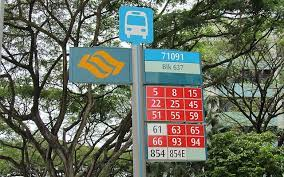

In [1]:
from gai.common.image_utils import read_to_base64
import os
from IPython.display import Image,display
encoded_string = read_to_base64("./buses.jpeg")
messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": "What’s in this image?"},
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/jpeg;base64,{encoded_string}",
                },
            },
        ],
    }
]
display(Image("./buses.jpeg"))

Example: Describe with Llava

DEBUG    httppost:url=http://localhost:12034/gen/v1/vision/completions
DEBUG    httppost:data={'messages': [{'content': [{'text': 'What’s in this image?', 'type': 'text'},
                           {'image_url': {'url': ''},
                            'type': 'image_url'}],
               'role': 'user'}],
 'stream': True}

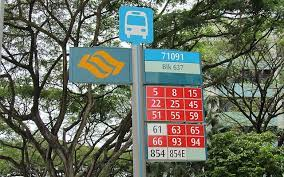

The image features a bus stop with a large bus sign and a bus schedule displayed on a pole. The sign is located near a tree, making it easily visible for commuters. The bus schedule lists the bus routes and their respective times, providing valuable information for passengers. The scene is set in an urban environment, likely in a city or town.({'finish_reason': 'stop'}, 'finish_reason')

In [2]:
# Llava
from gai.lib.GGG import GGG
ggg=GGG("./gai.local.yml")

for chunk in ggg(category="itt",
    type="gai",
    messages=messages,
    stream=True
    ):
    print(chunk.decode(),end="",flush=True)

Example: Describe with OpenAI Vision

In [4]:
# OpenAI
from gai.lib.GGG import GGG
ggg=GGG("./gai.local.yml")
for chunk in ggg(
    category="itt", 
    type="openai",
    messages=messages, 
    stream=True, 
    max_tokens=1000
    ):
    print(chunk.decode(), end="", flush=True)

This image shows a bus stop sign with various elements. There is a blue sign with a white bus icon indicating that it's a bus stop. Attached to that, there are two directional arrows: one pointing left with a bus interchange symbol and the other pointing right with an MRT (Mass Rapid Transit) symbol, suggesting the proximity of a bus interchange and an MRT station, respectively.

Below these symbols, there's a list of bus numbers displayed on multiple plates. The numbers are organized in two columns and are color-coded in red and green. These numbers represent the bus services available at this stop. A sign with the bus stop code "71091" is also present, which is typically used for identifying the stop in the city's public transport system or for using electronic tracking applications to get real-time updates on bus arrivals. The background shows green foliage, hinting that the bus stop may be located in a leafy area or near some trees.None

---

## Text-to-Image (TTI)

### Setup

Build the docker image using the following command in terminal.

```bash
docker buildx build \
    --build-arg CATEGORY=tti \
    -f ../../gai-sdk/gai-gen/Dockerfile.TTI \
    -t gai-tti:latest ../../gai-sdk/gai-gen/
```

Download model

```bash
mkdir ~/gai/models/Stable-diffusion
huggingface-cli download runwayml/stable-diffusion-v1-5 v1-5-pruned-emaonly.safetensors --local-dir ~/gai/models/Stable-diffusion --local-dir-use-symlinks False
```

Start service

In [2]:
%%bash
docker container rm -f gai-ttt gai-tts gai-stt gai-itt gai-tti
docker run -d \
    --gpus all \
    -e CLI_ARGS="--listen --api --xformers --medvram" \
    -v ~/gai/models/Stable-diffusion:/stable-diffusion-webui/models/Stable-diffusion \
    -v ~/gai/models/VAE:/stable-diffusion-webui/models/VAE \
    -p 12035:12035 \
    --name gai-tti \
    gai-tti:latest

Error response from daemon: No such container: gai-ttt
Error response from daemon: No such container: gai-tts
Error response from daemon: No such container: gai-stt
Error response from daemon: No such container: gai-itt
Error response from daemon: No such container: gai-tti


398fc800bb2a76b922a54fbce53de9bfb568fcb15180e83dd65c21527c68a9ac


### Example: Stable Diffusion

To check if stable diffusion is running, open browser and browse to "http://localhost:12035/docs"

DEBUG    httppost:url=http://127.0.0.1:12035/sdapi/v1/txt2img
DEBUG    httppost:data={'prompt': 'maltese puppy', 'steps': 5}


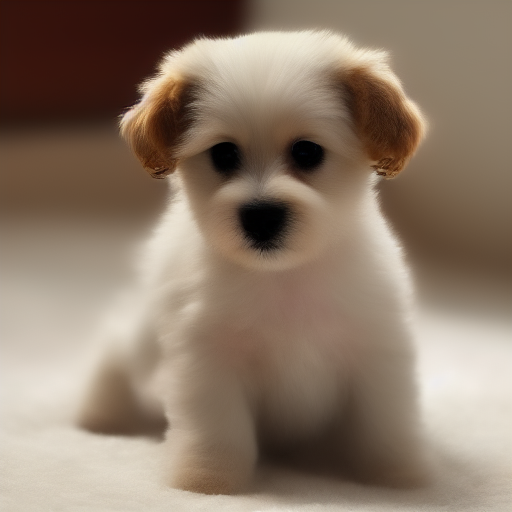

In [2]:
# stable diffusion
from gai.lib.GGG import GGG
ggg=GGG("./gai.local.yml")

image_data=ggg(category="tti",
    type="gai",
    prompt="maltese puppy",
    steps=5
    )
from PIL import Image
from io import BytesIO
from IPython.display import display
image = Image.open(BytesIO(image_data))
display(image)

### Example: OpenAI DALL-E 3

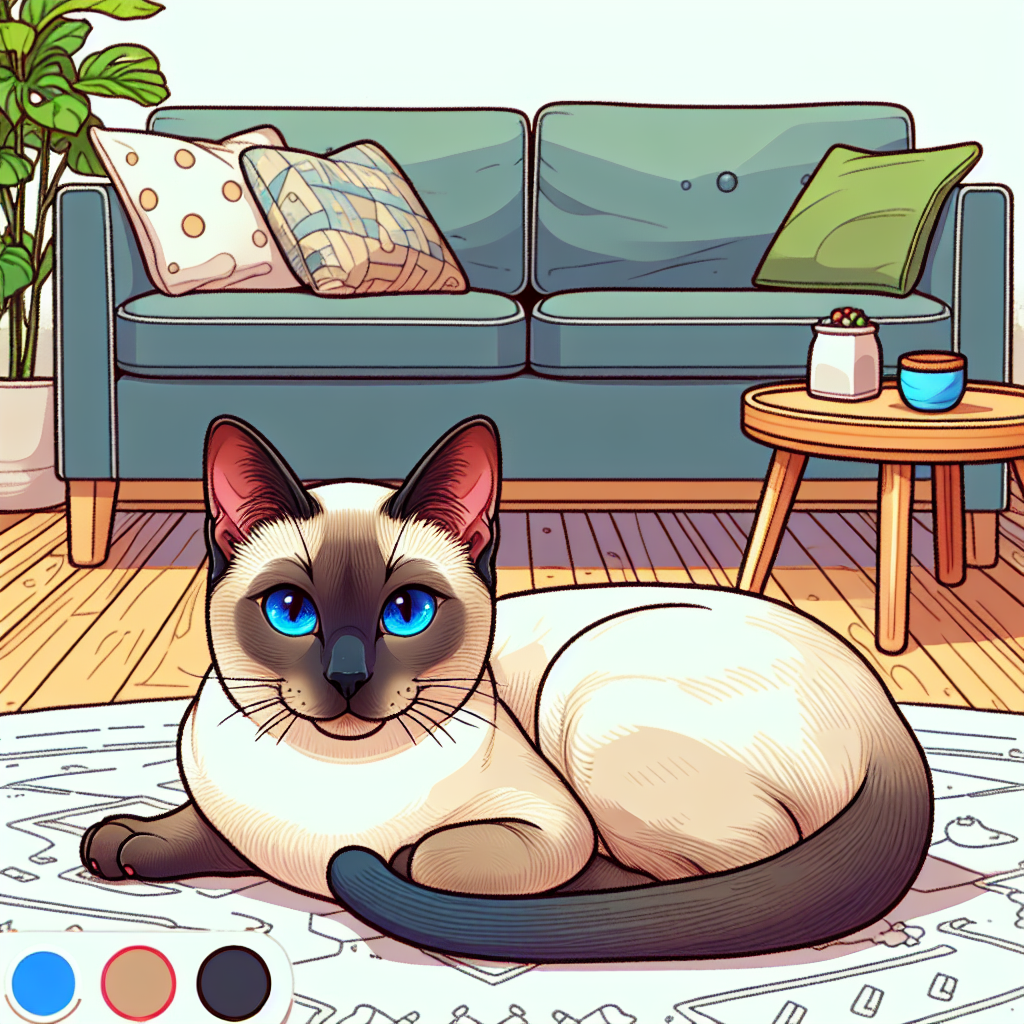

In [1]:
# openai
from gai.lib.GGG import GGG
ggg=GGG("./gai.local.yml")

image_data=ggg(category="tti",
    type="openai",
    prompt="siamese cat"
    )
from PIL import Image
from io import BytesIO
from IPython.display import display
image = Image.open(BytesIO(image_data))
display(image)

---
## Retrieval Augmented Generation (RAG)

### Setup

Build the docker image using the following command in terminal.

```bash
docker buildx build \
    --build-arg CATEGORY=rag \
    -f ../../gai-sdk/gai-gen/Dockerfile \
    -t gai-rag:latest ../../gai-sdk/gai-gen/
```

Download model

```bash
mkdir ~/gai/models
huggingface-cli download hkunlp/instructor-large \
        --local-dir ~/gai/models/instructor-large \
        --local-dir-use-symlinks False
```

Start service

In [7]:
%%bash
docker container rm -f gai-ttt gai-tts gai-stt gai-itt gai-tti gai-rag
docker run -d \
    -e DEFAULT_GENERATOR=instructor-rag \
    --gpus all \
    -v ~/gai/models:/app/models \
    -p 12036:12036 \
    --name gai-rag \
    gai-rag:latest

Error response from daemon: No such container: gai-ttt
Error response from daemon: No such container: gai-tts
Error response from daemon: No such container: gai-stt
Error response from daemon: No such container: gai-itt
Error response from daemon: No such container: gai-tti
Error response from daemon: No such container: gai-rag


576334d4b76229c02b56be0a8c05b35f64f8fd760f741ed8c46f2e619da8b593


Step 1: Index the file 'pm_long_speech_2023.txt' into the vector database. This will break down the file into chunks of 1000 char and convert to text embeddings, then store them in the database.

In [1]:
# Index 2023 national day speech 
import asyncio
from gai.lib.RAGClientAsync import RAGClientAsync

async def listener(status):
    print(status)
rag=RAGClientAsync("./gai.local.yml")
response = await rag.index_document_async(
        collection_name="demo",
        file_path="./pm_long_speech_2023.txt",
        title="2023 National Day Rally Speech",
        source="https://www.pmo.gov.sg/Newsroom/national-day-rally-2023",
        listener_callback=listener,
    )


DEBUG    httppost:url=http://localhost:12036/gen/v1/rag/index-file
DEBUG    httppost:data=None


In [2]:
# Confirm File Uploaded

from gai.lib.RAGClientAsync import RAGClientAsync
rag = RAGClientAsync("./gai.local.yml")
docs = await rag.list_documents_async()
print(docs)


{'documents': [{'Id': 'PwR6VmXqAfwjn84ZM6dePsLWTldPv8cNS5dESYlsY2U', 'CollectionName': 'demo', 'ByteSize': 43352, 'FileName': 'pm_long_speech_2023.txt', 'FileType': 'txt', 'Source': 'https://www.pmo.gov.sg/Newsroom/national-day-rally-2023', 'Abstract': None, 'Authors': '', 'Title': '2023 National Day Rally Speech', 'Publisher': '', 'PublishedDate': None, 'Comments': '', 'Keywords': '', 'CreatedAt': '2024-06-06T02:41:55.918093', 'UpdatedAt': '2024-06-06T07:00:50.964475', 'IsActive': True, 'ChunkGroups': [{'Id': 'bf6bad43-495e-4921-b735-31ad828c75f3', 'DocumentId': 'PwR6VmXqAfwjn84ZM6dePsLWTldPv8cNS5dESYlsY2U', 'SplitAlgo': 'recursive_split', 'ChunkCount': 66, 'ChunkSize': 1000, 'Overlap': 100, 'IsActive': True, 'ChunksDir': '/tmp/chunks/pm_long_speech_2023'}]}]}


### Step 3: Query and Retrieve

This method uses 2 models: local "instruct" model and openai "gpt4" based on the assumption that the local machine only has sufficient resources to run one model.

For example, retrieve uses the local "instruct" model to find the most relevant text from the database. In this case, we will assume that the local machine will not have sufficient resources to run a second model for response generation.Therefore, the found text will be passed to "openai" instead for generation.

In [4]:
from gai.lib.RAGClientAsync import RAGClientAsync
rag = RAGClientAsync("./gai.local.yml")
data = {
    "collection_name": "demo",
    "query_texts": "Who are the young seniors?",
}
response = await rag.retrieve_async(**data)
context = response
question = "Who are the young seniors?"

from gai.lib.GGG import GGG
ggg=GGG("../gai-lib/gai.yml")
answer = ggg("ttt", type="openai", messages=f"user: Based on the context below: <context>{context}</context>, answer the question: {question}\nassistant:")
for chunk in answer:
    print(chunk.decode(), end="", flush=True)

DEBUG    httppost:url=http://localhost:12036/gen/v1/rag/retrieve
DEBUG    httppost:data={'collection_name': 'demo', 'query_texts': 'Who are the young seniors?'}


The young seniors are individuals in their 50s and early 60s. They are younger than the Pioneer Generation and the Merdeka Generation. They may have recently retired or are soon to retire. Compared to the Pioneer and Merdeka Generations, they have benefited more from Singapore’s growth, yet they generally have earned less over their lifetimes compared to workers in their 30s and 40s. They have also had less time to benefit from the CPF system, resulting in less retirement savings. Many Young Seniors are responsible for caring for both the young and old in their families, shuttling between medical appointments and hospital visits, often while managing their own health.None

### Step 4: Query and Retrieve with Function Call

The AI will decide based on the context of the conversation, if the response require retrieval to answer the user's query.
The following example demonstrates the flow involving funct


In [24]:
# Setup
from gai.lib.GGG import GGG
ggg=GGG(("./gai.local.yml"))
tools = [
    {
        "type": "function",
        "function": {
            "name": "rag",
            "description": "The \'rag\' function is a specialized tool that allows the AI to perform semantic searches on PM Lee Hsien Loong\'s 2023 National Day Rally. It can be invoked when the AI needs to retrieve facts or information from the speech. This function utilizes advanced Natural Language Processing (NLP) techniques to understand and match the semantic meaning of the user\'s query with the content of the speech. This is particularly useful when the user\'s query relates to specific themes, topics, or statements made during the rally.",
            "parameters": {
                "type": "object",
                "properties": {
                    "search_query": {
                        "type": "array",
                        "items": {
                            "type":"string"
                        },
                        "description": "An array of query strings to perform a semantic search in the vector database. Each string in the array represents a different way of asking the question. This expands the coverage of the search and increases the chance of finding the best match. For example, instead of using one query like \'economic policies\', use multiple variations like [\'PM Lee Hsien Loong's economic policies announced at the 2023 National Day Rally\', \'What were the economic strategies discussed by PM Lee in 2023 National Day Rally?\', \'Economic measures announced by PM Lee in 2023 Rally\']."
                    }
                },
                "required": ["search_query"]
            }
        }
    }
]

# Objective
question = "What new policies were announced?"

# Function Call
messages = [{'role':'user','content':question},{'role':'assistant','content':''}]
response = ggg(category="ttt",
    type="openai",
    messages=messages, 
    tools=tools,
    stream=False)
result=response.decode()
query_texts=result["arguments"]
query_texts

'{\n"search_query": ["new policies announced by PM Lee Hsien Loong at the 2023 National Day Rally", "What new strategies were discussed by PM Lee in 2023 National Day Rally?", "New measures announced by PM Lee in 2023 Rally"]\n}'

In [25]:
# Retrieval
from gai.lib.RAGClientAsync import RAGClientAsync
rag = RAGClientAsync("./gai.local.yml")
data = {
    "collection_name": "demo",
    "query_texts": query_texts,
}
response = await rag.retrieve_async(**data)
response

DEBUG    httppost:url=http://localhost:12036/gen/v1/rag/retrieve
DEBUG    httppost:data={'collection_name': 'demo',
 'query_texts': '{\n'
                '"search_query": ["new policies announced by PM Lee Hsien '
                'Loong at the 2023 National Day Rally", "What new strategies '
                'were discussed by PM Lee in 2023 National Day Rally?", "New '
                'measures announced by PM Lee in 2023 Rally"]\n'
                '}'}


[{'documents': 'Recently, several controversial issues have drawn Singaporeans’ attention. I have spoken about them in Parliament, and in my National Day Message. We dealt with each of them thoroughly and transparently. Let me assure you: these incidents will not delay my timetable for renewal. We are on track.\n\nMore and more, my task is to support the 4G team and their agenda. I want to get them off to the best start possible. They are increasingly setting the pace. My themes in this Rally are all Forward SG themes. The 4G will soon wrap up the Forward SG exercise, but their journey is just beginning. Our nation’s future depends on them, working as one with you to take Singapore forward.',
  'metadatas': {'Abstract': '',
   'ChunkGroupId': 'bf6bad43-495e-4921-b735-31ad828c75f3',
   'DocumentId': 'PwR6VmXqAfwjn84ZM6dePsLWTldPv8cNS5dESYlsY2U',
   'Keywords': '',
   'PublishedDate': '',
   'Source': 'https://www.pmo.gov.sg/Newsroom/national-day-rally-2023',
   'Title': '2023 National D

In [26]:
# Response
context = response

from gai.lib.GGG import GGG
ggg=GGG("./gai.local.yml")
answer = ggg("ttt", type="openai", messages=f"user: Based on the context below: <context>{context}</context>, answer the question: {question}\nassistant:")
for chunk in answer:
    print(chunk.decode(), end="", flush=True)

The text does not provide information on any new policies being announced.None